<a href="https://colab.research.google.com/github/yeganamuradli/COVID-19/blob/master/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import plotly
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
pd.plotting.register_matplotlib_converters
%matplotlib inline

print("Setup Complete")

Setup Complete


In [ ]:
data = pd.read_csv('time_series_covid19_confirmed_global.csv', index_col = "Country/Region")
data

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/13/22,3/14/22,3/15/22,3/16/22,3/17/22,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.939110,67.709953,0,0,0,0,0,0,0,...,176201,176409,176571,176743,176918,176983,177039,177093,177191,177255
Albania,NaN,41.153300,20.168300,0,0,0,0,0,0,0,...,272663,272689,272711,272804,272885,272961,273040,273088,273088,273146
Algeria,NaN,28.033900,1.659600,0,0,0,0,0,0,0,...,265432,265457,265478,265496,265511,265524,265539,265550,265562,265573
Andorra,NaN,42.506300,1.521800,0,0,0,0,0,0,0,...,38794,38794,38794,38794,39234,39234,39234,39234,39234,39234
Angola,NaN,-11.202700,17.873900,0,0,0,0,0,0,0,...,98927,98931,98956,98985,99003,99003,99003,99003,99010,99058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,31.952200,35.233200,0,0,0,0,0,0,0,...,653293,653854,654068,654068,654380,654380,654380,654380,654954,654954
Winter Olympics 2022,NaN,39.904200,116.407400,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,NaN,15.552727,48.516388,0,0,0,0,0,0,0,...,11784,11793,11793,11797,11797,11797,11799,11801,11801,11802


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284 entries, Afghanistan to Zimbabwe
Columns: 794 entries, Province/State to 3/22/22
dtypes: float64(2), int64(791), object(1)
memory usage: 1.7+ MB


In [ ]:
data.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/13/22,3/14/22,3/15/22,3/16/22,3/17/22,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22
count,282.000000,282.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.00000,284.000000,284.000000,...,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02,2.840000e+02
mean,20.106368,21.958718,1.961268,2.313380,3.323944,5.059859,7.464789,10.31338,19.647887,21.721831,...,1.613916e+06,1.620023e+06,1.626591e+06,1.634526e+06,1.641759e+06,1.648361e+06,1.653926e+06,1.657530e+06,1.662387e+06,1.669422e+06
std,25.841453,75.893366,26.402603,26.499491,32.992032,45.919425,64.175242,86.46777,212.163754,213.470672,...,6.239054e+06,6.247615e+06,6.258008e+06,6.270238e+06,6.282430e+06,6.293385e+06,6.301160e+06,6.306199e+06,6.313993e+06,6.326220e+06
min,-71.949900,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.643279,-22.036550,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,8.666500e+03,8.666500e+03,8.666500e+03,8.835500e+03,8.836000e+03,9.424750e+03,9.427750e+03,9.427750e+03,9.429250e+03,9.448000e+03
50%,21.607878,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,7.150800e+04,7.171850e+04,7.201050e+04,7.212500e+04,7.468450e+04,7.617750e+04,7.632050e+04,7.642200e+04,7.654750e+04,7.671400e+04
75%,40.950592,84.992575,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,7.943328e+05,7.944632e+05,7.950848e+05,7.957042e+05,7.963390e+05,7.969938e+05,7.974970e+05,7.976455e+05,8.131760e+05,8.137815e+05
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.00000,3554.000000,3554.000000,...,7.952554e+07,7.956029e+07,7.958584e+07,7.963085e+07,7.968374e+07,7.971725e+07,7.972816e+07,7.973479e+07,7.978043e+07,7.980344e+07


In [26]:
data.head()



,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/13/22,3/14/22,3/15/22,3/16/22,3/17/22,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,...,176201,176409,176571,176743,176918,176983,177039,177093,177191,177255
Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,...,272663,272689,272711,272804,272885,272961,273040,273088,273088,273146
Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,...,265432,265457,265478,265496,265511,265524,265539,265550,265562,265573
Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,...,38794,38794,38794,38794,39234,39234,39234,39234,39234,39234
Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,...,98927,98931,98956,98985,99003,99003,99003,99003,99010,99058


In [27]:
data.tail()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/13/22,3/14/22,3/15/22,3/16/22,3/17/22,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
West Bank and Gaza,NaN,31.952200,35.233200,0,0,0,0,0,0,0,...,653293,653854,654068,654068,654380,654380,654380,654380,654954,654954
Winter Olympics 2022,NaN,39.904200,116.407400,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,NaN,15.552727,48.516388,0,0,0,0,0,0,0,...,11784,11793,11793,11797,11797,11797,11799,11801,11801,11802
Zambia,NaN,-13.133897,27.849332,0,0,0,0,0,0,0,...,315202,315202,315202,315496,315623,315623,315623,315623,315892,316088
Zimbabwe,NaN,-19.015438,29.154857,0,0,0,0,0,0,0,...,242515,242909,242909,243650,243650,244012,244452,244452,244685,244685


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'ConfnSusp')

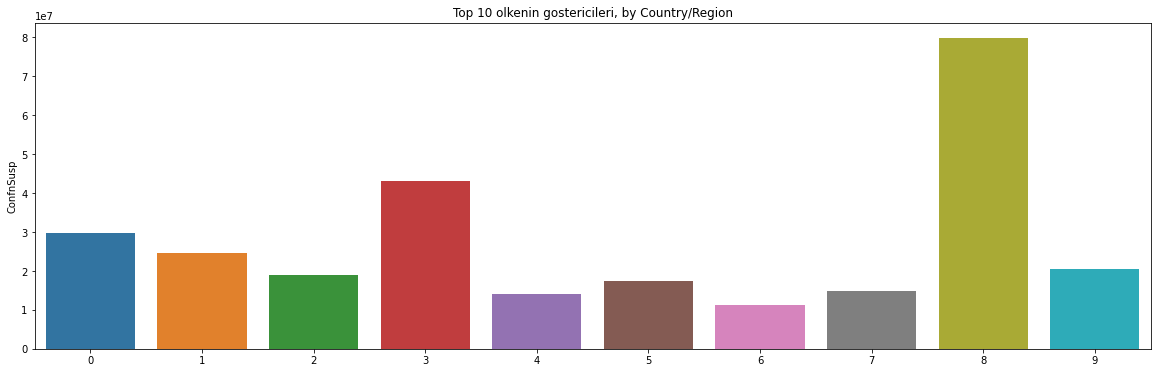

In [59]:
data = data.groupby("Country/Region")['3/16/22','3/17/22','3/18/22','3/19/22','3/20/22','3/21/22','3/22/22'].sum().reset_index()
data = data.sort_values(by=['3/22/22'], ascending=False).head(10)
plt.figure(figsize=(20,6))
plt.title("Top 10 olkenin gostericileri, by Country/Region",)
sns.barplot(x=data.index, y=data['3/22/22'])
plt.ylabel("ConfnSusp")
